We are going to use a dataset about New York City Motor Vehicles Crashes taken from NYC Open Data which is a great resource for data sets. This dataset is quite small and this notebook will just be an overview of different stuff to look out for when cleaning data.
    Source of data:
https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

In [31]:
import pandas as pd
import numpy as np
filename="datasets/data_100000.csv"
df_orig = pd.read_csv(filename, parse_dates=[['crash_date', 'crash_time']], skipinitialspace = True)
df = df_orig.copy()
df.shape

(100000, 28)

In [32]:
df = df.rename(columns={'crash_date_crash_time': 'crash_date_time'})
df.dtypes
#df.crash_date_time.value_counts()

crash_date_time                  datetime64[ns]
borough                                  object
zip_code                                float64
latitude                                float64
longitude                               float64
location                                 object
on_street_name                           object
off_street_name                          object
cross_street_name                        object
number_of_persons_injured                 int64
number_of_persons_killed                  int64
number_of_pedestrians_injured             int64
number_of_pedestrians_killed              int64
number_of_cyclist_injured                 int64
number_of_cyclist_killed                  int64
number_of_motorist_injured                int64
number_of_motorist_killed                 int64
contributing_factor_vehicle_1            object
contributing_factor_vehicle_2            object
contributing_factor_vehicle_3            object
contributing_factor_vehicle_4           

In [33]:
# Just learning how to split the feature crash_date_time into day, month and year

df["day"] = df['crash_date_time'].map(lambda x: x.day)
df["month"] = df['crash_date_time'].map(lambda x: x.month)
df["year"] = df['crash_date_time'].map(lambda x: x.year)
df["hour"] = df['crash_date_time'].map(lambda x: x.hour)
df["minute"] = df['crash_date_time'].map(lambda x: x.minute)

df[['crash_date_time', 'hour', 'minute','day', 'month', 'year']].head()

,crash_date_time,hour,minute,day,month,year
0,2017-04-18 23:10:00,23,10,18,4,2017
1,2017-05-06 13:00:00,13,0,6,5,2017
2,2017-04-27 17:15:00,17,15,27,4,2017
3,2017-05-09 20:10:00,20,10,9,5,2017
4,2017-04-18 14:00:00,14,0,18,4,2017


In [4]:
print("There are {} rows of data".format(len(df)))

There are 100000 rows of data


In [34]:
# There are no duplicates
df.duplicated().any()

False

In [35]:
#Check for unique of data (cols)
df.duplicated()
print("Number Of Rows In The Original DataFrame:", len(df))
print("Number Of Rows After Deduping:", len(df.drop_duplicates()))

Number Of Rows In The Original DataFrame: 100000
Number Of Rows After Deduping: 100000


In [ ]:
# Checking how many rows of each attribute are NaN
print(f'Sum of null values by columns: {df.isnull().sum()} \n')

In [36]:
#Set collision_id as index
#df.collision_id.unique()
df.set_index('collision_id')

,crash_date_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,...,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,day,month,year,hour,minute
collision_id,,,,,,,,,,,,,,,,,,,,,
3654181,2017-04-18 23:10:00,STATEN ISLAND,10312.0,40.536728,-74.193344,"(40.536728, -74.193344)",NaN,NaN,243 DARLINGTON AVENUE,0,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,18,4,2017,23,10
3665311,2017-05-06 13:00:00,BRONX,10472.0,40.829052,-73.850380,"(40.829052, -73.85038)",CASTLE HILL AVENUE,BLACKROCK AVENUE,NaN,1,...,Sedan,NaN,NaN,NaN,NaN,6,5,2017,13,0
3658491,2017-04-27 17:15:00,QUEENS,11420.0,40.677303,-73.804565,"(40.677303, -73.804565)",135 STREET,FOCH BOULEVARD,NaN,0,...,Sedan,Sedan,NaN,NaN,NaN,27,4,2017,17,15
3666554,2017-05-09 20:10:00,NaN,NaN,40.624958,-74.145775,"(40.624958, -74.145775)",FOREST AVENUE,RICHMOND AVENUE,NaN,1,...,Motorcycle,Sedan,Bus,NaN,NaN,9,5,2017,20,10
3653269,2017-04-18 14:00:00,BRONX,10456.0,40.828846,-73.903120,"(40.828846, -73.90312)",NaN,NaN,1167 BOSTON ROAD,0,...,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,18,4,2017,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244961,2019-11-20 15:00:00,BROOKLYN,11210.0,40.618893,-73.946420,"(40.618893, -73.94642)",NaN,NaN,1314 EAST 29 STREET,0,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,20,11,2019,15,0
4250093,2019-12-01 11:22:00,QUEENS,11367.0,40.723380,-73.814750,"(40.72338, -73.81475)",NaN,NaN,150-62 76 ROAD,0,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1,12,2019,11,22
4245290,2019-11-21 21:30:00,BROOKLYN,11249.0,40.710820,-73.968530,"(40.71082, -73.96853)",BROADWAY,KENT AVENUE,NaN,0,...,Sedan,Box Truck,NaN,NaN,NaN,21,11,2019,21,30


In [37]:
# Drop the redundant columns: e.g. `location` since we still have latitude, longitude
# and number of pedestrians/cyclist/motorist injured/killed 
# because my target is how many people died or injured on which street?

df = df.drop(columns= ['location',
                     'zip_code',
                     'number_of_pedestrians_injured',
                     'number_of_pedestrians_killed',
                     'number_of_cyclist_injured',
                     'number_of_cyclist_killed', 
                     'number_of_motorist_injured',
                     'number_of_motorist_killed'
                      ], axis=1)
df.columns

Index(['crash_date_time', 'borough', 'latitude', 'longitude', 'on_street_name',
       'off_street_name', 'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code1', 'vehicle_type_code2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'day', 'month', 'year', 'hour', 'minute'],
      dtype='object')

In [38]:
# Eliminating the redundant spaces for all columns
get_column_names = df.columns.tolist()
for col in get_column_names:
    df[col] = df[col].astype(str).str.strip()

In [39]:
# Rename unconventional column name to avoid confusion later
df = df.rename(columns={'vehicle_type_code1': 'vehicle_type_code_1', 
                        'vehicle_type_code2': 'vehicle_type_code_2'
                       })

In [40]:
#Lowercase: contributing_factor_vehicle_x, vehicle_type_code_x  

df["vehicle_type_code_1"] = df["vehicle_type_code_1"].map(lambda x: x if type(x)!=str else x.lower())
df["vehicle_type_code_2"] = df["vehicle_type_code_2"].map(lambda x: x if type(x)!=str else x.lower())
df["vehicle_type_code_3"] = df["vehicle_type_code_3"].map(lambda x: x if type(x)!=str else x.lower())
df["vehicle_type_code_4"] = df["vehicle_type_code_4"].map(lambda x: x if type(x)!=str else x.lower())
df["vehicle_type_code_5"] = df["vehicle_type_code_5"].map(lambda x: x if type(x)!=str else x.lower())

df["contributing_factor_vehicle_1"] = df["contributing_factor_vehicle_1"].map(lambda x: x if type(x)!=str else x.lower())
df["contributing_factor_vehicle_2"] = df["contributing_factor_vehicle_2"].map(lambda x: x if type(x)!=str else x.lower())
df["contributing_factor_vehicle_3"] = df["contributing_factor_vehicle_3"].map(lambda x: x if type(x)!=str else x.lower())
df["contributing_factor_vehicle_4"] = df["contributing_factor_vehicle_4"].map(lambda x: x if type(x)!=str else x.lower())
df["contributing_factor_vehicle_5"] = df["contributing_factor_vehicle_5"].map(lambda x: x if type(x)!=str else x.lower())

In [41]:
df1 = df.dropna() #take out the rows containing NaN values
#df1.isnull().sum()

In [42]:
# Exporting the the clean dataset
df1.to_csv('datasets/data_clean_PRECISE.csv')

In [43]:

df1.head(50)

,crash_date_time,borough,latitude,longitude,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,contributing_factor_vehicle_1,...,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5,day,month,year,hour,minute
0,2017-04-18 23:10:00,STATEN ISLAND,40.536728,-74.193344,nan,nan,243 DARLINGTON AVENUE,0,0,driver inattention/distraction,...,station wagon/sport utility vehicle,nan,nan,nan,nan,18,4,2017,23,10
1,2017-05-06 13:00:00,BRONX,40.829052,-73.85038,CASTLE HILL AVENUE,BLACKROCK AVENUE,nan,1,0,failure to yield right-of-way,...,sedan,nan,nan,nan,nan,6,5,2017,13,0
2,2017-04-27 17:15:00,QUEENS,40.677303,-73.804565,135 STREET,FOCH BOULEVARD,nan,0,0,driver inattention/distraction,...,sedan,sedan,nan,nan,nan,27,4,2017,17,15
3,2017-05-09 20:10:00,nan,40.624958,-74.145775,FOREST AVENUE,RICHMOND AVENUE,nan,1,0,unspecified,...,motorcycle,sedan,bus,nan,nan,9,5,2017,20,10
4,2017-04-18 14:00:00,BRONX,40.828846,-73.90312,nan,nan,1167 BOSTON ROAD,0,0,driver inattention/distraction,...,sedan,station wagon/sport utility vehicle,nan,nan,nan,18,4,2017,14,0
5,2017-05-08 10:33:00,nan,40.556454,-74.20777,WEST SHORE EXPRESSWAY,nan,nan,0,0,unsafe lane changing,...,sedan,sedan,nan,nan,nan,8,5,2017,10,33
6,2017-05-10 06:10:00,nan,40.740025,-73.97626,1 AVENUE,EAST 28 STREET,nan,0,0,passing or lane usage improper,...,taxi,box truck,nan,nan,nan,10,5,2017,6,10
7,2017-04-24 09:30:00,BROOKLYN,40.651646,-73.93233,EAST 48 STREET,CHURCH AVENUE,nan,0,0,other vehicular,...,station wagon/sport utility vehicle,station wagon/sport utility vehicle,nan,nan,nan,24,4,2017,9,30
8,2017-04-14 13:00:00,nan,40.7518,-73.817314,ROBINSON STREET,nan,nan,0,0,passing too closely,...,sedan,station wagon/sport utility vehicle,nan,nan,nan,14,4,2017,13,0
9,2017-05-02 01:00:00,BRONX,40.816864,-73.882744,nan,nan,772 EDGEWATER ROAD,0,0,unspecified,...,pick-up truck,nan,nan,nan,nan,2,5,2017,1,0


In [44]:
# Transpose the data frame so that it fits in a cell
df.describe(include='all').T 
#df['crash_date'].sample(5)

,count,unique,top,freq
crash_date_time,100000,66119,2020-08-04 14:00:00,28
borough,100000,6,nan,35026
latitude,100000,33676,nan,8035
longitude,100000,26495,nan,8035
on_street_name,100000,4328,nan,26009
off_street_name,100000,4863,nan,52875
cross_street_name,100000,22830,nan,74033
number_of_persons_injured,100000,13,0,72699
number_of_persons_killed,100000,4,0,99816
contributing_factor_vehicle_1,100000,55,driver inattention/distraction,25605


## Preprocessing dataset

In [45]:
# Print the number of unique values of each column, only printing those that have less than 100 unique values
get_column_names = df.columns
for i in range(len(get_column_names)):
    if df[df.columns[i]].nunique() < 100:
        print(f'######### {df.columns[i]} # has {df[df.columns[i]].nunique()} unique values: ############# \n {df[df.columns[i]].unique()} \n')

######### borough # has 6 unique values: ############# 
 ['STATEN ISLAND' 'BRONX' 'QUEENS' 'nan' 'BROOKLYN' 'MANHATTAN'] 

######### number_of_persons_injured # has 13 unique values: ############# 
 ['0' '1' '3' '8' '2' '4' '5' '6' '7' '9' '11' '15' '10'] 

######### number_of_persons_killed # has 4 unique values: ############# 
 ['0' '1' '2' '3'] 

######### contributing_factor_vehicle_1 # has 55 unique values: ############# 
 ['driver inattention/distraction' 'failure to yield right-of-way'
 'unspecified' 'unsafe lane changing' 'passing or lane usage improper'
 'other vehicular' 'passing too closely' 'backing unsafely'
 'traffic control disregarded' 'driver inexperience' 'unsafe speed'
 'following too closely' 'obstruction/debris' 'turning improperly'
 'pedestrian/bicyclist/other pedestrian error/confusion'
 'pavement slippery' 'aggressive driving/road rage'
 'reaction to uninvolved vehicle' 'steering failure' 'oversized vehicle'
 'view obstructed/limited' 'traffic control device imp

In [46]:
#Categorizing values in contributing_factors_vehicles_x columns

def catergorizing_contributing_values(value):
    distraction_lst = ['driver inattention/distraction','passenger distraction','fell asleep','outside car distraction',
                   'fatigued/drowsy','cell phone (hand-held)','using on board navigation device',
                   'tinted windows','eating or drinking', 'other electronic device', 'cell phone (hands-free)',
                   'listening/using headphones']
    driver_mistake_lst = ['following too closely','failure to yield right-of-way','backing unsafely',
                      'passing or lane usage improper','passing too closely','unsafe lane changing',
                      'turning improperly','driver inexperience', 'failure to keep right',
                      'driverless/runaway vehicle', 'oversized vehicle']
    illegal_action_lst = ['unsafe speed','alcohol involvement','traffic control disregarded','aggressive driving/road rage',
                      'drugs (illegal)']
    other_involvement_lst =  ['other vehicular','reaction to uninvolved vehicle', 'animals action',
                          'view obstructed/limited','pedestrian/bicyclist/other pedestrian error/confusion',
                           'glare','vehicle vandalism']
    bad_infrastructure_lst = ['pavement slippery', 'obstruction/debris','pavement defective',
                               'other lighting defects']
    car_failures_lst = ['brakes defective', 'steering failure', 'tire failure/inadequate',
                    'traffic control device improper/non-working', 'lane marking improper/inadequate',
                    'tow hitch defective','headlights defective', 'shoulders defective/improper',
                    'windshield inadequate']
    medical_lst = ['lost consciousness', 'illnes','accelerator defective','physical disability','prescription medication']
    
    if value in distraction_lst:
        return "distraction"
    elif value in car_failures_lst:
        return "car_failure"
    elif value in bad_infrastructure_lst:
        return "bad_road_infrastructure"
    elif value in other_involvement_lst:
        return "other_involvement"
    elif value in illegal_action_lst:
        return "illegal_action"
    elif value in driver_mistake_lst:
        return "driver_mistake"
    elif value in medical_lst:
        return "medical"

df["contributing_vehicle_1"] = df["contributing_factor_vehicle_1"].apply(lambda x: catergorizing_contributing_values(x))
df["contributing_vehicle_2"] = df["contributing_factor_vehicle_2"].apply(lambda x: catergorizing_contributing_values(x))
df["contributing_vehicle_3"] = df["contributing_factor_vehicle_3"].apply(lambda x: catergorizing_contributing_values(x))
df["contributing_vehicle_4"] = df["contributing_factor_vehicle_4"].apply(lambda x: catergorizing_contributing_values(x))
df["contributing_vehicle_5"] = df["contributing_factor_vehicle_5"].apply(lambda x: catergorizing_contributing_values(x))    

In [47]:
#Categorizing values in vehicle_type_code_x columns

def catergorizing_vehicle_type(vehicle):
    garbage_list = ['garba', 'garbage or refuse', 'dump', 'garbage tr']
    trucks_list = ['tow truck / wrecker', 'truck', 'tuck', 'box truck', 
                   'tractor truck diesel',  'tractor truck gasoline',  
                   'tow truck / wrecker', 'pick-up truck', 'tanker', 'beverage truck', 
                   'armored truck', 'van t', 'boxtr', 'tow t', 'tk', 
                   'fdny truck', 'trk']
    wagon_list = ['sport utility / station wagon', 'station wagon/sport utility vehicle', 
                  'station_wagon', 'sedan', 'lunch wagon']
    campers_list = ['motorized home', 'van camper', 'rv', 
                    'pickup with mounted camper', 'mobil']
    schoolbus_list = ['schoo', 'school bus']
    taxi_list = ['taxi', 'chassis cab', 'pedicab']
    
    
    if vehicle in garbage_list:
        return 'garbage_car'
    elif vehicle in trucks_list:
        return 'truck'
    elif vehicle in schoolbus_list:
        return 'school_bus'
    elif vehicle in wagon_list:
        return 'station_wagon'
    elif vehicle in taxi_list:
        return 'taxi'
    elif vehicle in campers_list:
        return 'camper_van'
df["vehicle_1"] = df["vehicle_type_code_1"].apply(lambda x: catergorizing_vehicle_type(x))
df["vehicle_2"] = df["vehicle_type_code_2"].apply(lambda x: catergorizing_vehicle_type(x))
df["vehicle_3"] = df["vehicle_type_code_3"].apply(lambda x: catergorizing_vehicle_type(x))
df["vehicle_4"] = df["vehicle_type_code_4"].apply(lambda x: catergorizing_vehicle_type(x))
df["vehicle_5"] = df["vehicle_type_code_5"].apply(lambda x: catergorizing_vehicle_type(x))

In [48]:
df.columns
df.shape

(100000, 35)

#### One hot encoding

In [49]:
# One-hot encoding (dummy values) for Vehicle Type
df = pd.get_dummies(data=df, columns=['vehicle_1',
                                       'vehicle_2',
                                       'vehicle_3',
                                       'vehicle_4',
                                       'vehicle_5'])
df.columns

Index(['crash_date_time', 'borough', 'latitude', 'longitude', 'on_street_name',
       'off_street_name', 'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'day', 'month', 'year', 'hour', 'minute', 'contributing_vehicle_1',
       'contributing_vehicle_2', 'contributing_vehicle_3',
       'contributing_vehicle_4', 'contributing_vehicle_5',
       'vehicle_1_camper_van', 'vehicle_1_garbage_car', 'vehicle_1_school_bus',
       'vehicle_1_station_wagon', 'vehicle_1_taxi', 'vehicle_1_truck',
       'vehicle_2_camper_van', 'vehicle_2_garbage_car', 'vehicle_2_school_bus',
       'vehicle_2_station_wagon', 'vehicle_2_taxi', 'vehicle_

In [50]:
# One-hot encoding (dummy values) for Contributing factors
df = pd.get_dummies(data=df, columns=['contributing_vehicle_1',
                                       'contributing_vehicle_2',
                                       'contributing_vehicle_3',
                                       'contributing_vehicle_4',
                                       'contributing_vehicle_5'])
df.columns

Index(['crash_date_time', 'borough', 'latitude', 'longitude', 'on_street_name',
       'off_street_name', 'cross_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'day', 'month', 'year', 'hour', 'minute', 'vehicle_1_camper_van',
       'vehicle_1_garbage_car', 'vehicle_1_school_bus',
       'vehicle_1_station_wagon', 'vehicle_1_taxi', 'vehicle_1_truck',
       'vehicle_2_camper_van', 'vehicle_2_garbage_car', 'vehicle_2_school_bus',
       'vehicle_2_station_wagon', 'vehicle_2_taxi', 'vehicle_2_truck',
       'vehicle_3_garbage_car', 'vehicle_3_school_bus',
       'vehicle_3_station_wagon', 'vehicle_3_taxi', 'vehicle_3_truck',
       

In [51]:
columns_to_drop = ['vehicle_type_code_1',
                  'vehicle_type_code_2',
                  'vehicle_type_code_3',
                  'vehicle_type_code_4',
                  'vehicle_type_code_5', 
                  'contributing_factor_vehicle_1',
                  'contributing_factor_vehicle_2',
                  'contributing_factor_vehicle_3',
                  'contributing_factor_vehicle_4',
                  'contributing_factor_vehicle_5']
df = df.drop(columns= columns_to_drop, axis = 1)

In [52]:
df.shape

(100000, 69)

In [53]:
# Exporting the the clean dataset
df.to_csv('datasets/data_clean_GOOD_ENOUGH.csv')

## Plotting some attributes

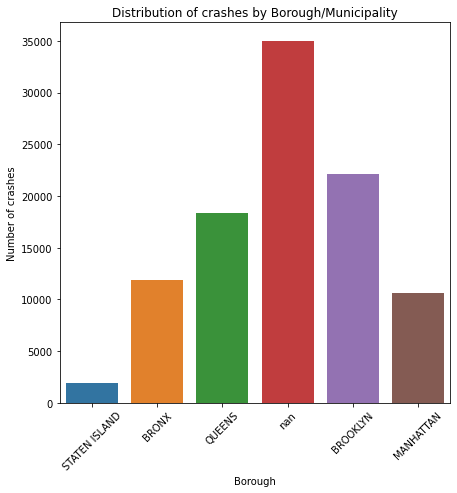

In [26]:
# which Borough has more crashes
import matplotlib.pyplot as plt
import seaborn as sns


fig,ax = plt.subplots(figsize=(7,7))
ax = sns.countplot(x="borough", data=df)
plt.title("Distribution of crashes by Borough/Municipality")
plt.xlabel("Borough")
plt.ylabel('Number of crashes')
ticks = plt.setp(ax.get_xticklabels(),rotation=45)